In [1]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import tensorflow as tf
#Here we are transforming every pixel value from [0,255] to [0,1] and storing it in two variables. So that it will be ready to be given as an input into the Neural Network model.
train_datagen = ImageDataGenerator(rescale= 1./255)
validation = ImageDataGenerator(rescale= 1./255)

#Here we are getting all the dataset to train and validate and by giving the targetsize, the dimensions of the images will be resized to (224,224) and the class mode is categorical because we have only one type of class to predict.
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/UD SculptureDataset/TRAIN',
                                                 target_size = (224,224),
                                                 batch_size = 34,
                                                 class_mode = 'categorical')

val_data = validation.flow_from_directory('/content/drive/MyDrive/UD SculptureDataset/VALIDATION',
                                                 target_size = (224,224),
                                                 batch_size = 34,
                                                 class_mode = 'categorical')

Found 3615 images belonging to 24 classes.
Found 385 images belonging to 24 classes.


In [2]:
#Efficient lite4 pretrained model is taken and given to the variable base_model.

base_model = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/lite4/feature-vector/2",
                               trainable=False)
#We are defining a new model and passing the base model as a parameter to use the model and efficientnet model, activation as softmax to make the output to fit between 0 and 1.
model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dense(24, activation='softmax')
])
model.build([1, 224, 224, 3])
model.summary()

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

#The model fit performs how well the model has been trained by predicting the test images.
history = model.fit(train_data,epochs=10,validation_data=val_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (1, 1280)                 11837936  
                                                                 
 dense (Dense)               (1, 24)                   30744     
                                                                 
Total params: 11,868,680
Trainable params: 30,744
Non-trainable params: 11,837,936
_________________________________________________________________
Epoch 1/10
107/107 [==============================] - 3104s 29s/step - loss: 0.9009 - accuracy: 0.7970 - val_loss: 0.2750 - val_accuracy: 0.9558
Epoch 2/10
107/107 [==============================] - 1511s 14s/step - loss: 0.1787 - accuracy: 0.9685 - val_loss: 0.1462 - val_accuracy: 0.9818
Epoch 3/10
107/107 [==============================] - 1681s 16s/step - loss: 0.1014 - accuracy: 0.9834 - val_loss: 0.1132 - val_accuracy: 0.9870


<Figure size 432x288 with 0 Axes>

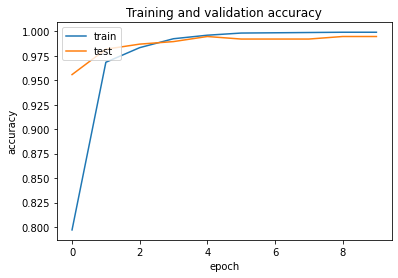

<Figure size 432x288 with 0 Axes>

In [13]:
#Here we are taking the accuracy and validation accuracy from the output of model fit and plotting the train and validation accuracy graph

import matplotlib.pyplot as plt
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
epochs = range(len(acc))

plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()


In [5]:
#Converting the model to tf.lite in the above step, which is the source to convert to onxx to be used in unity.

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa65rs3w6/assets


INFO:tensorflow:Assets written to: /tmp/tmpa65rs3w6/assets


In [6]:
!pip install onnxruntime

     |████████████████████████████████| 4.8 MB 17.2 MB/s 


In [7]:
!pip install -U tf2onnx

     |████████████████████████████████| 435 kB 31.6 MB/s 
     |████████████████████████████████| 12.7 MB 47.4 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [8]:
!pip install git+https://github.com/onnx/tensorflow-onnx

  Cloning https://github.com/onnx/tensorflow-onnx to /tmp/pip-req-build-qj8m4rhu
  Running command git clone -q https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-qj8m4rhu
  Created wheel for tf2onnx: filename=tf2onnx-1.10.0-py3-none-any.whl size=435728 sha256=995a468a8082a27d67b5967a0fbe800c1dfb29e44666de69e0467427b95e69af
  Stored in directory: /tmp/pip-ephem-wheel-cache-okz2wpki/wheels/73/99/8e/3034c9b47124da4ac24a6ea72b8da1be5af878e37c2e953bb3
Successfully built tf2onnx
  Attempting uninstall: tf2onnx
    Found existing installation: tf2onnx 1.9.3
    Uninstalling tf2onnx-1.9.3:
      Successfully uninstalled tf2onnx-1.9.3


In [9]:
!git clone https://github.com/onnx/tensorflow-onnx

Cloning into 'tensorflow-onnx'...
remote: Enumerating objects: 14833, done.
remote: Counting objects: 100% (1987/1987), done.
remote: Compressing objects: 100% (859/859), done.
remote: Total 14833 (delta 1390), reused 1560 (delta 1075), pack-reused 12846
Receiving objects: 100% (14833/14833), 26.74 MiB | 29.29 MiB/s, done.
Resolving deltas: 100% (11136/11136), done.


In [10]:
!python /content/tensorflow-onnx/setup.py install

running install
running bdist_egg
running egg_info
creating tf2onnx.egg-info
writing tf2onnx.egg-info/PKG-INFO
writing dependency_links to tf2onnx.egg-info/dependency_links.txt
writing requirements to tf2onnx.egg-info/requires.txt
writing top-level names to tf2onnx.egg-info/top_level.txt
writing manifest file 'tf2onnx.egg-info/SOURCES.txt'
listing git files failed - pretending there aren't any
reading manifest file 'tf2onnx.egg-info/SOURCES.txt'
writing manifest file 'tf2onnx.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/requires.txt -> build

In [11]:
!python /content/tensorflow-onnx/setup.py bdist_wheel

running bdist_wheel
running build
running build_py
running create_version
installing to build/bdist.linux-x86_64/wheel
running install
running install_egg_info
running egg_info
writing tf2onnx.egg-info/PKG-INFO
writing dependency_links to tf2onnx.egg-info/dependency_links.txt
writing requirements to tf2onnx.egg-info/requires.txt
writing top-level names to tf2onnx.egg-info/top_level.txt
listing git files failed - pretending there aren't any
reading manifest file 'tf2onnx.egg-info/SOURCES.txt'
writing manifest file 'tf2onnx.egg-info/SOURCES.txt'
Copying tf2onnx.egg-info to build/bdist.linux-x86_64/wheel/tf2onnx-1.10.0-py3.7.egg-info
running install_scripts
creating build/bdist.linux-x86_64/wheel/tf2onnx-1.10.0.dist-info/WHEEL
creating 'dist/tf2onnx-1.10.0-py3-none-any.whl' and adding 'build/bdist.linux-x86_64/wheel' to it
adding 'tf2onnx-1.10.0.dist-info/METADATA'
adding 'tf2onnx-1.10.0.dist-info/WHEEL'
adding 'tf2onnx-1.10.0.dist-info/top_level.txt'
adding 'tf2onnx-1.10.0.dist-info/RECO

In [12]:
#In the step we are converting the model to onxx file.

!python -m tf2onnx.convert --opset 11 --tflite /content/model.tflite --output model1.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-11-28 05:45:04,468 - INFO - Using tensorflow=2.7.0, onnx=1.10.2, tf2onnx=1.10.0/d018aa
2021-11-28 05:45:04,468 - INFO - Using opset <onnx, 11>
2021-11-28 05:45:05,353 - INFO - Optimizing ONNX model
2021-11-28 05:45:07,498 - INFO - After optimization: Const -151 (339->188), GlobalAveragePool +1 (0->1), Identity -1 (1->0), ReduceMean -1 (1->0), Reshape -30 (30->0), Squeeze +1 (0->1), Transpose -364 (365->1)
2021-11-28 05:45:07,696 - INFO - 
2021-11-28 05:45:07,696 - INFO - Successfully converted TensorFlow model /content/model.tflite to ONNX
2021-11-28 05:45:07,696 - INFO - Model inputs: ['serving_default_keras_layer_input:0']
2021-11-28 05:45:07,697 - INFO - Model outputs: ['StatefulPartitionedCall:0']
2021-11-28 05:45:07,697 - INFO - ONNX model i